<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part4_alpha_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.9MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=57ccb723b98bbf22bd2dfffb97e881c45d8da73c7807067f42a6cab6cfc205bc
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma, alpha, mew):
    S, E, I, R = y
    dSdt = mew - (beta * S * I) - mew*S
    dEdt = (beta * S * I)  - (mew + alpha)*E
    dIdt = (alpha*E) - (mew + gamma)*I
    dRdt = gamma*I   -  mew*R
    return dSdt, dEdt, dIdt, dRdt

In [3]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [4]:
""" alpha is a list of 1000 random number in (0.05,1) """

import random
alpha = []
for i in range(1000):
    alpha.append(random.uniform(0, 1))
    


In [5]:
""" multiplier is a list of 1000 random number in (1,3) """

import random
multiplier = []
for i in range(1000):
    multiplier.append(random.uniform(1,3))

In [6]:
""" beta is (1,3) times of gamma values """
# Multiplying two lists 
beta = [] 
for i in range(1000): 
    beta.append(gamma[i] * multiplier[i])

In [7]:
mew =  0.0133

In [8]:
beta_list = []
for i in range(1000):
  for j in range(10):
    beta_list.append(beta[i])  
  
Beta = pd.DataFrame(beta_list)

In [9]:
gamma_list = []
for i in range(1000):
  for j in range(10):
    gamma_list.append(gamma[i])  
  
Gamma = pd.DataFrame(gamma_list)

In [10]:
alpha_list = []
for i in range(1000):
  for j in range(10):
    alpha_list.append(alpha[i])  
  
Alpha = pd.DataFrame(alpha_list)

In [11]:
""" P, Q, M, T are the list of S, E, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M = []
T = []
for i in range(1000): #Plotted for 2 sets
  N = 1
  S0, E0, I0, R0 = 0.99,0.005,0.005,0   # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, E0, I0, R0 # Initial conditions vector
  # Integrate the SEIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i], alpha[i],mew))
  S, I, E, R = ret.T
  P.append(S)
  Q.append(E)
  M.append(I)
  T.append(R)

  

In [12]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
E_value = pd.DataFrame(Q)
I_value = pd.DataFrame(M)
R_value = pd.DataFrame(T)

In [13]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 itens and each item itself list of 10 values 
    and S_actual, I_actual, R_actual are list of S, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """

S_list = []
S_actual = []
E_list = []
E_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  E_list.append(E_value[p].iloc[i].to_list())
  E_actual.append(E_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [14]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

exposed_list = []
for i in range(1000):
 exposed_list = exposed_list+E_list[i] 

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i]

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]

susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

exposedactual_list = []
for i in range(1000):
 exposedactual_list = exposedactual_list+E_actual[i]  

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]

In [15]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(exposed_list)
df_3 = pd.DataFrame(infected_list)
df_4 = pd.DataFrame(recov_list)
df_5 = pd.DataFrame(susactual_list)
df_6 = pd.DataFrame(exposedactual_list)
df_7 = pd.DataFrame(infectedactual_list)
df_8 = pd.DataFrame(recovactual_list)

In [16]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,df_7,df_8,Beta,Gamma,Alpha], axis=1)
data.columns = range(data.shape[1])
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.466166,0.003789,0.011875,0.518170,0.470691,0.003706,0.011641,0.513962,1.450137,0.708822,0.22306
1,0.554804,0.035686,0.118211,0.291299,0.532543,0.036154,0.118545,0.312758,1.450137,0.708822,0.22306
2,0.834238,0.017260,0.063495,0.085006,0.814900,0.018998,0.069456,0.096646,1.450137,0.708822,0.22306
3,0.513763,0.003234,0.010378,0.472626,0.517791,0.003216,0.010342,0.468652,1.450137,0.708822,0.22306
4,0.984218,0.003636,0.009218,0.002928,0.979486,0.003462,0.011702,0.005349,1.450137,0.708822,0.22306


In [17]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6,7,8,9,10]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [18]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.394744,0.015305,0.047170,0.618296,0.397217,0.014947,0.046481,0.606666,0.501331,0.709060,0.222968
1,0.495882,0.144281,0.469955,0.347586,0.468103,0.145956,0.473728,0.369165,0.501331,0.709060,0.222968
2,0.814724,0.069777,0.252407,0.101432,0.791698,0.076692,0.277540,0.114066,0.501331,0.709060,0.222968
3,0.449053,0.013060,0.041219,0.563950,0.451196,0.012970,0.041287,0.553181,0.501331,0.709060,0.222968
4,0.985855,0.014686,0.036604,0.003494,0.980322,0.013963,0.046725,0.006300,0.501331,0.709060,0.222968
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.988517,0.028336,0.019816,0.001721,0.986832,0.030729,0.020767,0.002359,0.075113,0.080553,0.253552
9996,0.920726,0.118371,0.072037,0.030372,0.914496,0.125827,0.076834,0.032501,0.075113,0.080553,0.253552
9997,0.733281,0.358330,0.193655,0.119081,0.718616,0.374090,0.201563,0.124832,0.075113,0.080553,0.253552
9998,0.648958,0.458163,0.232198,0.166233,0.632526,0.474123,0.238968,0.173209,0.075113,0.080553,0.253552


In [19]:
data_scaled[[0,1,2,3,4,5,6,7,8,9,10]] = data_scaled[[0,1,2,3,4,5,6,7,8,9,10]].apply(lambda x: x*100) 

In [20]:
data_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,39.474396,1.530542,4.716997,61.829583,39.721658,1.494741,4.648126,60.666597,50.133135,70.906027,22.296849
1,49.588211,14.428150,46.995466,34.758596,46.810301,14.595595,47.372809,36.916472,50.133135,70.906027,22.296849
2,81.472360,6.977739,25.240741,10.143202,79.169824,7.669166,27.753956,11.406582,50.133135,70.906027,22.296849
3,44.905311,1.306036,4.121897,56.395042,45.119597,1.296973,4.128664,55.318118,50.133135,70.906027,22.296849
4,98.585481,1.468626,3.660383,0.349429,98.032204,1.396343,4.672510,0.629967,50.133135,70.906027,22.296849
...,...,...,...,...,...,...,...,...,...,...,...
9995,98.851695,2.833614,1.981564,0.172062,98.683247,3.072947,2.076738,0.235913,7.511303,8.055345,25.355215
9996,92.072560,11.837135,7.203741,3.037158,91.449629,12.582731,7.683442,3.250110,7.511303,8.055345,25.355215
9997,73.328078,35.832988,19.365480,11.908123,71.861576,37.408992,20.156314,12.483179,7.511303,8.055345,25.355215
9998,64.895846,45.816309,23.219773,16.623329,63.252619,47.412280,23.896786,17.320854,7.511303,8.055345,25.355215


In [72]:
X = data_scaled[[0,1,2,3,4,5,6,7]]
y = data_scaled[10]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_dev, X_test1, y_dev, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [75]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
ddev = xgb.DMatrix(X_dev, label=y_dev)
dtest = xgb.DMatrix(X_test1, label=y_test1)

In [76]:
from sklearn.metrics import mean_absolute_error

In [77]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [78]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [79]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [80]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[02:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 8.1877612 for 607 rounds
CV with max_depth=9, min_child_weight=6
[02:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [81]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [82]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [83]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[02:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 7.9555784 for 700 rounds
CV with subsample=1.0, colsample=0.9
[02:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:

In [84]:
params['subsample'] = 0.7
params['colsample_bytree'] = 1

In [85]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
CV with eta=0.3
[02:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 49 s, sys: 163 ms, total: 49.2 s
Wall time: 24.8 s
	MAE 7.932004999999999 for 437 rounds

CV with eta=0.2
[02:54:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:46] WARNING: /workspace/src/o

In [86]:
params['eta'] = .1

In [87]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")],
    early_stopping_rounds=10
)

[02:59:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:47.1664
Will train until DEV-mae hasn't improved in 10 rounds.
[1]	DEV-mae:42.5285
[2]	DEV-mae:38.3604
[3]	DEV-mae:34.6643
[4]	DEV-mae:31.3853
[5]	DEV-mae:28.4842
[6]	DEV-mae:25.9742
[7]	DEV-mae:23.7586
[8]	DEV-mae:21.842
[9]	DEV-mae:20.1547
[10]	DEV-mae:18.6823
[11]	DEV-mae:17.3841
[12]	DEV-mae:16.3268
[13]	DEV-mae:15.3935
[14]	DEV-mae:14.569
[15]	DEV-mae:13.8327
[16]	DEV-mae:13.224
[17]	DEV-mae:12.7255
[18]	DEV-mae:12.2956
[19]	DEV-mae:11.9213
[20]	DEV-mae:11.5957
[21]	DEV-mae:11.3277
[22]	DEV-mae:11.0968
[23]	DEV-mae:10.9191
[24]	DEV-mae:10.7794
[25]	DEV-mae:10.6412
[26]	DEV-mae:10.5441
[27]	DEV-mae:10.4346
[28]	DEV-mae:10.3443
[29]	DEV-mae:10.2727
[30]	DEV-mae:10.2092
[31]	DEV-mae:10.1336
[32]	DEV-mae:10.1016
[33]	DEV-mae:10.0267
[34]	DEV-mae:9.98533
[35]	DEV-mae:9.94698
[36]	DEV-mae:9.91798
[37]	DEV-mae:9.88537
[38]	DEV-mae:9.81976
[39]	DEV-mae

In [88]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[02:59:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:45.89
[1]	Test-mae:41.3917
[2]	Test-mae:37.3221
[3]	Test-mae:33.7055
[4]	Test-mae:30.5313
[5]	Test-mae:27.696
[6]	Test-mae:25.2691
[7]	Test-mae:23.0679
[8]	Test-mae:21.1762
[9]	Test-mae:19.5326
[10]	Test-mae:18.0824
[11]	Test-mae:16.8521
[12]	Test-mae:15.7756
[13]	Test-mae:14.8387
[14]	Test-mae:14.028
[15]	Test-mae:13.3014
[16]	Test-mae:12.692
[17]	Test-mae:12.1599
[18]	Test-mae:11.7429
[19]	Test-mae:11.4084
[20]	Test-mae:11.0982
[21]	Test-mae:10.8221
[22]	Test-mae:10.5815
[23]	Test-mae:10.4152
[24]	Test-mae:10.2431
[25]	Test-mae:10.1097
[26]	Test-mae:10.0196
[27]	Test-mae:9.91341
[28]	Test-mae:9.85812
[29]	Test-mae:9.79071
[30]	Test-mae:9.72483
[31]	Test-mae:9.64981
[32]	Test-mae:9.60395
[33]	Test-mae:9.53099
[34]	Test-mae:9.49506
[35]	Test-mae:9.45505
[36]	Test-mae:9.41924
[37]	Test-mae:9.3951
[38]	Test-mae:9.34502
[39]	Test-mae:9.31426
[40]	Test

In [89]:
mean_absolute_error(best_model.predict(dtest), y_test1)

6.945245669296202

In [90]:
best_model.save_model("my_model.model")

In [91]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[02:59:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


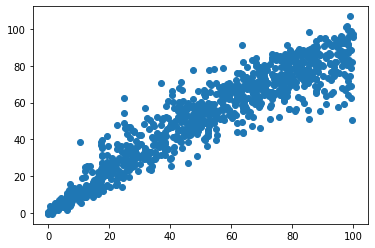

In [92]:
plt.scatter(y_test1,p)

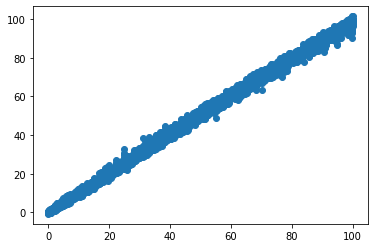

In [93]:
plt.scatter(y_train,q)

In [95]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test1, p))
r2_test = r2_score(y_test1, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 1.2892482257739628
R2 score of training set is 0.9980579444837685


The model performance for the test set
-------------------------------------------
RMSE of test set is 9.762507097408033
R2 score of test set is 0.8857674515574274
